# Health Insurance Premium Prediction

### Overview
Health insurance premium prediction involves analyzing various factors to determine the cost of coverage for individuals. This process plays a crucial role in risk assessment and resource allocation for insurers.

### Dataset
The dataset used for health insurance premium prediction includes variables such as age, gender, BMI, smoking status, region of residence, number of children, and insurance premium charges. This data is essential for training predictive models.

### Objectives
1. Develop a predictive model that accurately estimates health insurance premiums based on individual characteristics.
2. Explore the impact of different factors such as age, gender, and lifestyle choices on insurance premium charges.
3. Enhance risk assessment capabilities for insurers by providing accurate premium predictions.

### Methodology
1. **Data Collection and Preprocessing**: Gather comprehensive datasets and preprocess them by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Feature Engineering**: Extract relevant features and create new ones if necessary to improve model performance.
3. **Model Selection**: Explore various machine learning algorithms including linear regression, decision trees, random forests, and gradient boosting to identify the most suitable model for premium prediction.
4. **Model Training and Evaluation**: Train the selected model on the preprocessed dataset and evaluate its performance using metrics such as mean absolute error, mean squared error, and R-squared.
5. **Prediction and Interpretation**: Deploy the trained model to make predictions on new data and interpret the results to provide insights into factors influencing health insurance premiums.

### Libraries

In [1]:
import pandas as pd  # Importing the pandas library and using the alias pd for convenient access to its functions
import numpy as np
import seaborn as sns  # Importing the seaborn library and using the alias sns for data visualization
import matplotlib.pyplot as plt  # Importing the pyplot module from the matplotlib library and using the alias plt for plotting
from optbinning import OptimalBinning

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder       # Importing LabelEncoder from sklearn.preprocessing
from sklearn.model_selection import train_test_split # Importing the train_test_split function from sklearn library for splitting data into training and testing sets
from sklearn.metrics import r2_score



import warnings  # Importing the warnings module for managing warning outputs
warnings.filterwarnings('ignore')  # Disabling warning outputs

%config InlineBackend.figure_format = 'svg'
sns.set(style='white')  # Setting the style for seaborn plots

### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
5. [**Data Splitting**](#sixth): Split the training dataset into features (x) and the target variable (y) to prepare for model training.
6. [**Model Training**](#seventh): Utilize machine learning algorithms to train a predictive model on the training data.
7. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.


# <a id='first'></a> Loading Data

In [2]:
# Path to the CSV data file
DATAPATH = './data/Health_insurance.csv' 

# Reading data from the CSV file into a DataFrame using the first column as the index
df = pd.read_csv(DATAPATH)  

# Displaying the first few rows of the DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Retrieve the column names of the DataFrame 'df'
column_names = df.columns
# Print the column names
print(column_names)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### Description of Columns

- **age**: Age of the insurance policyholder.
- **sex**: Gender of the insurance policyholder.
- **bmi**: Body Mass Index (BMI) of the insurance policyholder.
- **children**: Number of children covered under the insurance policy.
- **smoker**: Indicates whether the policyholder is a smoker (Yes/No).
- **region**: Geographical region of the policyholder.
- **charges**: Amount of insurance premium charges.


In [4]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(1338, 7)


# <a id='second'></a> Data Preprocessing

In [5]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Displaying the data types of each column in the DataFrame
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Counting the number of missing values in each column and then counting
# the frequency of those counts to summarize the distribution of missing values
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Counting the number of duplicated rows in the DataFrame and then counting
# the frequency of those counts to summarize the distribution of duplicated rows
df.duplicated().value_counts()


False    1337
True        1
Name: count, dtype: int64

In [9]:
# Remove duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

# <a id='third'></a> Exploratory Data Analysis

In [10]:
# Generate descriptive statistics for all numerical columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Generate descriptive statistics for categorical columns
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


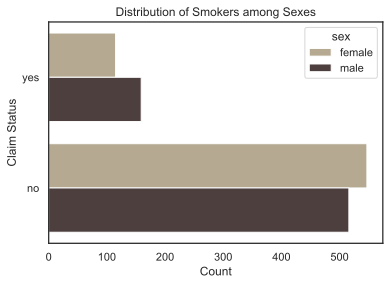

In [12]:
# Creating a count plot to visualize the distribution of claim status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='smoker', hue='sex', palette=['#BBAB8C', '#503C3C'])
plt.xlabel('Count')
plt.ylabel('Claim Status')
plt.title('Distribution of Smokers among Sexes')
plt.show()


In [13]:
# Specifying a list of categorical columns
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['sex', 'smoker', 'region'], dtype='object')

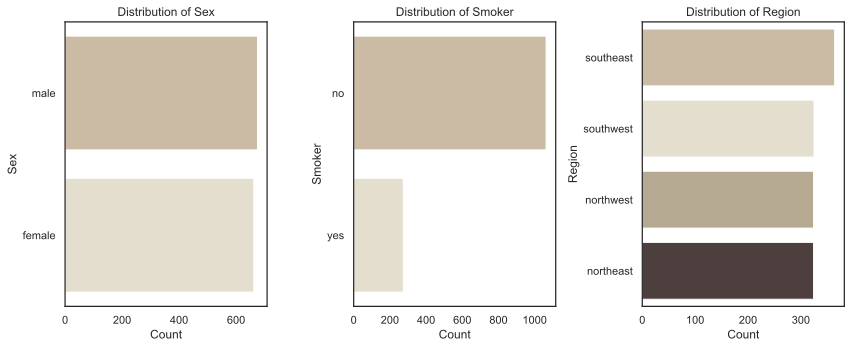

In [14]:
# Creating subplots to visualize the distribution of categorical columns
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=col, palette = ['#E8DFCA', '#D1BB9E', '#BBAB8C', '#503C3C'])
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel('Count')
    plt.ylabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

In [15]:
# Selecting the numerical columns from the DataFrame and storing their column names in a variable
numerical_columns = df.select_dtypes(include='number').columns

# Displaying the column names of the selected numerical columns
numerical_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

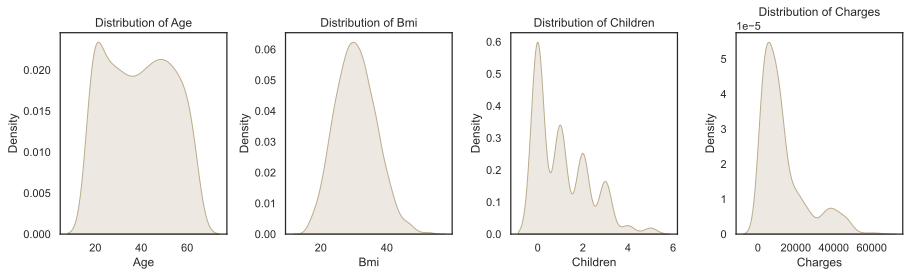

In [16]:
# plotting distributions of numerical features
plt.figure(figsize=(13, 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3, 4, i)
    sns.kdeplot(df[col], fill = True, color = '#BBAB8C') 
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')

plt.tight_layout()
plt.show()

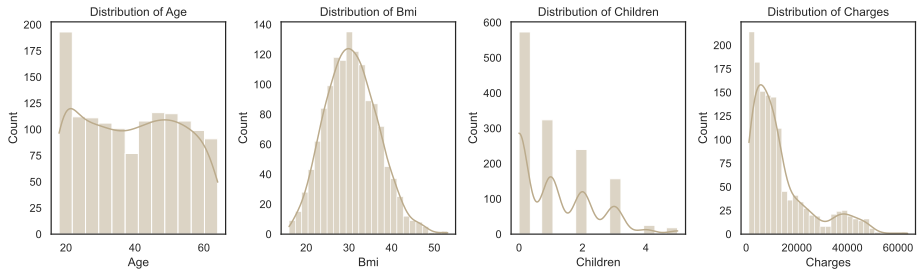

In [17]:
# Creating subplots to visualize the distribution of numerical columns
plt.figure(figsize=(13, 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data=df, x=col, color='#BBAB8C', kde=True)
    plt.title(f'Distribution of {" ".join([el.title() for el in col.split("_")])}')
    plt.xlabel(f'{" ".join([el.title() for el in col.split("_")])}')
plt.tight_layout()
plt.show()

In [18]:
# Group the dataframe by 'smoker' and 'sex', and calculate the percentage of smokers for each group
df.groupby(['smoker', 'sex']).agg(smokers=('smoker', lambda x: '{:.2%}'.format(x.count() / len(df))))

smokers
smoker sex           
no     female  40.91%
       male    38.59%
yes    female   8.60%
       male    11.89%

Data analysis reveals interesting insights into the relationship between smoking status, gender, and insurance premium charges. Among non-smokers, both males and females contribute to a significant portion of the insurance pool, with females accounting for 40.91% and males for 38.59%. However, among smokers, the distribution shifts noticeably, with females comprising 8.60% and males 11.89% of the insured population. This indicates that smoking status may have a discernible impact on insurance risk assessment and premium determination. Insurers may consider adjusting premium rates based on smoking status to accurately reflect associated health risks and ensure fair pricing for policyholders.




In [19]:
# Group the dataframe by 'sex' and 'smoker', and calculate the mean charges for each group
df.groupby(['sex', 'smoker']).agg(charges=('charges', 'mean'))

charges
sex    smoker              
female no       8762.297300
       yes     30678.996276
male   no       8099.700161
       yes     33042.005975

The data showcases notable disparities in insurance premium charges based on gender and smoking status. Among non-smokers, females have an average charge of $8,762.30, while males have slightly lower charges at $8,099.70. However, among smokers, the contrast is stark, with females facing substantially lower charges of $30,678.99 compared to males at $33,042.01. This discrepancy underscores the significant impact of smoking on insurance costs and highlights the importance of considering both gender and smoking status in premium determination.


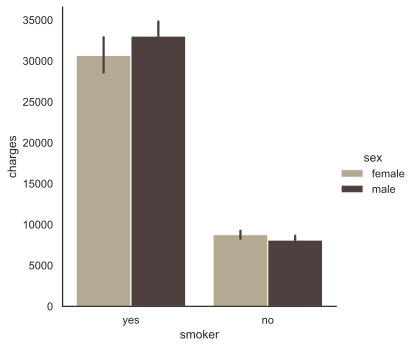

In [20]:

# Create a categorical plot (bar plot) for charges vs. smoker status, colored by sex
sns.catplot(data=df, x='smoker', y='charges', hue='sex', kind='bar', palette=['#BBAB8C', '#503C3C'])

# Show the plot
plt.show()


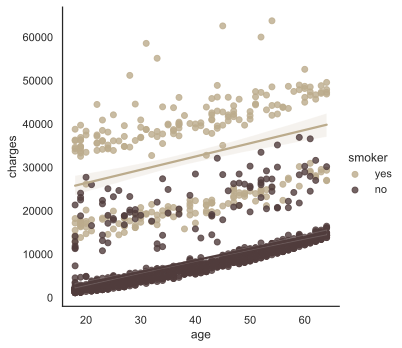

In [21]:
# Create a scatter plot with a linear regression line for charges vs. age, colored by smoker status
sns.lmplot(data=df, x='age', y='charges', hue='smoker', palette=['#BBAB8C', '#503C3C'])

# Show the plot
plt.show()

In [22]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Group the dataframe by 'region' and 'smoker', and calculate the mean charges for each group
df.groupby(['region', 'smoker']).agg(mean_charges_by_smoker_region=('charges', 'mean'))


mean_charges_by_smoker_region
region    smoker                               
northeast no                        9165.531672
          yes                      29673.536473
northwest no                        8582.467101
          yes                      30192.003182
southeast no                        8032.216309
          yes                      34844.996824
southwest no                        8019.284513
          yes                      32269.063494

In [23]:
# Group the dataframe by 'region' and 'smoker', and calculate the mean age for each group
df.groupby(['region', 'smoker']).agg(mean_age_region_smoker=('age', 'mean'))


mean_age_region_smoker
region    smoker                        
northeast no                   39.536965
          yes                  38.238806
northwest no                   39.244361
          yes                  39.327586
southeast no                   38.673993
          yes                  39.736264
southwest no                   40.183521
          yes                  36.103448

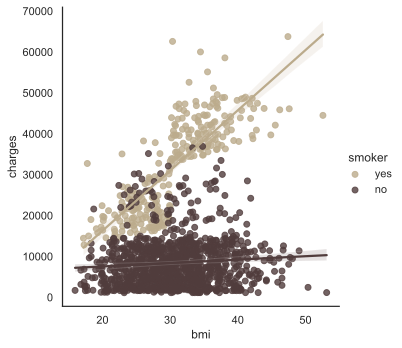

In [24]:
# Create a scatter plot with a linear regression line for charges vs. BMI, colored by smoker status
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', palette=['#BBAB8C', '#503C3C'])

# Show the plot
plt.show()

In [25]:
# Bin the 'bmi' column into 30 quantiles and assign labels to a new column 'bmi_binned'
df['bmi_binned'] = pd.qcut(df['bmi'], q=30, labels=False)

# Group the dataframe by 'bmi_binned' and 'smoker', and calculate the mean charges for each group
df.groupby(['bmi_binned', 'smoker']).agg(mean_charges_by_bmi=('charges', 'mean'))



mean_charges_by_bmi
bmi_binned smoker                     
0          no              6308.334366
           yes            18435.382104
1          no              6445.768164
           yes            16757.926210
2          no              7213.350786
           yes            20755.268877
3          no              7382.978247
           yes            22538.552158
4          no              8523.280276
           yes            20881.241332
5          no              9852.609877
           yes            20756.424400
6          no              8758.655487
           yes            21530.330207
7          no              7263.351767
           yes            23849.112960
8          no              8859.157543
           yes            22215.529073
9          no              9295.266888
           yes            22490.481793
10         no              8302.212901
           yes            22312.823571
11         no              8213.331505
           yes            22488.798197
12         no              6310.721693
           yes            21571.195708
13         no              9119.355908
           yes            24557.539857
14         no              7690.019204
           yes            35978.384804
15         no              8490.051584
           yes            39700.273339
16         no              7390.989670
           yes            38994.588625
17         no              9427.781843
           yes            37885.611900
18         no              9612.715679
           yes            42414.675196
19         no              9129.210583
           yes            39214.073236
20         no              9608.212870
           yes            37960.995292
21         no              7954.806934
           yes            43050.281750
22         no              7007.987925
           yes            41148.280334
23         no              7719.481541
           yes            41266.414501
24         no             11942.095141
           yes            42749.074549
25         no              9154.530941
           yes            43068.060628
26         no             10875.171732
           yes            43832.416419
27         no              8949.376501
           yes            42127.119183
28         no              9021.593809
           yes            46122.427761
29         no              7430.505152
           yes            45599.582974

In [26]:
# Drop the temporary 'bmi_binned' column
df.drop(columns=['bmi_binned'], inplace=True)


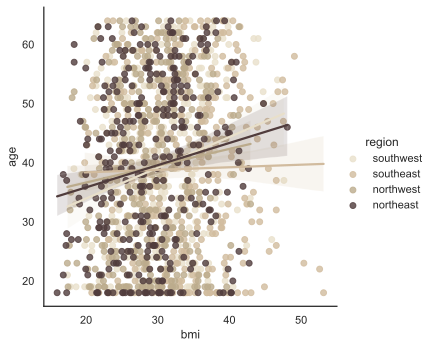

In [27]:
# Create a scatter plot with a linear regression line for age vs. BMI, colored by region
sns.lmplot(data=df, x='bmi', y='age', hue='region', palette=['#E8DFCA', '#D1BB9E', '#BBAB8C', '#503C3C'])

# Show the plot
plt.show()

In [28]:
# Group the dataframe by 'children', 'sex', and 'smoker', and calculate the mean charges for each group
df.groupby(['children', 'sex', 'smoker']).agg(mean_charges_by_sex_smoker_children=('charges', 'mean'))

mean_charges_by_sex_smoker_children
children sex    smoker                                     
0        female no                              7688.318863
                yes                            30685.059887
         male   no                              7557.343810
                yes                            31902.398075
1        female no                              8758.560884
                yes                            30264.253915
         male   no                              7837.147396
                yes                            32904.876848
2        female no                              9921.777645
                yes                            31663.833195
         male   no                              9020.567024
                yes                            35297.837461
3        female no                             10128.716357
                yes                            30681.604257
         male   no                              9025.530139
                yes                            33869.169434
4        female no                             13937.674562
         male   no                             10305.014255
                yes                            26532.276933
5        female no                              8544.113050
                yes                            19023.260000
         male   no                              7931.658310

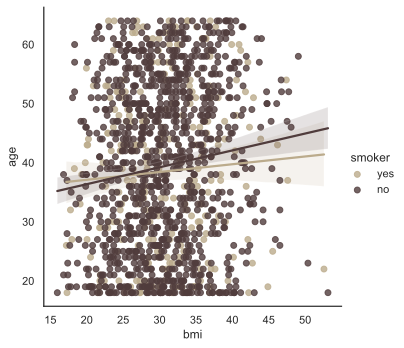

In [29]:
# Create a scatter plot with a linear regression line for age vs. BMI, colored by smoker status
sns.lmplot(data=df, x='bmi', y='age', hue='smoker', palette=['#BBAB8C', '#503C3C'])

# Show the plot
plt.show()

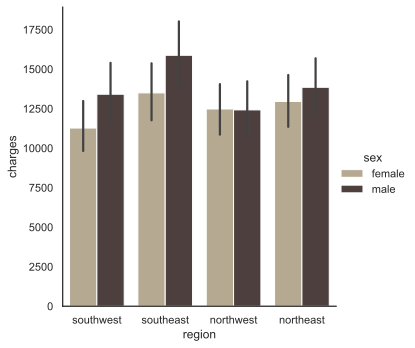

In [30]:
# Create a categorical plot (bar plot) for charges vs. region, colored by sex
sns.catplot(data=df, x='region', y='charges', hue='sex', kind='bar', palette=['#BBAB8C', '#503C3C'])

# Show the plot
plt.show()

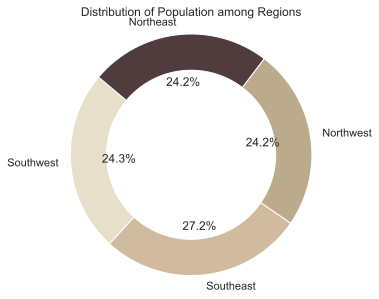

In [31]:
# Store the counts in a list
regions = ['southwest', 'southeast', 'northwest', 'northeast']
counts = [(df['region'] == item).sum() for item in regions]

# Define labels for the counts
labels = ['Southwest', 'Southeast', 'Northwest', 'Northeast']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#E8DFCA', '#D1BB9E', '#BBAB8C', '#503C3C'])

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Population among Regions')

plt.show()

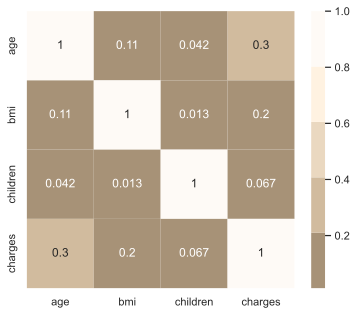

In [32]:
# Set the figure size
plt.figure(figsize=(6, 5))

# Create a heatmap of the correlation matrix for numerical columns in the dataframe
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])

# Show the plot
plt.show()


Based on the analysis, here are some conclusions:

1. **Smoking Status**: The data shows a clear distinction between smokers and non-smokers, with a higher percentage of males smoking compared to females. This could suggest a gender-specific approach to smoking cessation programs.

2. **Impact of Smoking on Medical Costs**: The analysis confirms that smoking significantly increases medical costs, regardless of gender. This underscores the financial implications of smoking, beyond its known health effects.

3. **Age Factor**: Medical costs increase with age for both smokers and non-smokers, but the increase is more pronounced for smokers. This could be due to age-related health complications being exacerbated by smoking.

4. **BMI and Medical Costs**: The data shows a correlation between BMI and medical costs, with smokers in each BMI group spending significantly more than non-smokers. This suggests that both BMI and smoking status are important factors in predicting medical costs.

5. **BMI Variation**: The average BMI varies depending on age, gender, and smoking status. Interestingly, smokers have a slightly lower average BMI compared to non-smokers in the same age groups. This could warrant further investigation to understand the underlying reasons.

6. **Influence of Gender and Number of Children**: The analysis shows that average medical costs also depend on gender, smoking status, and the number of children. This suggests that family size and gender are additional factors that could influence medical costs.

7. **Regional Differences**: The data reveals regional differences in medical costs, with the highest average costs for smokers in the southeast region and the lowest for non-smokers in the southwest region. This could reflect regional variations in healthcare costs or lifestyle factors.

8. **Age Variation by Region and Smoking Status**: The average age varies depending on the region and smoking status, with non-smokers in each region being slightly older than smokers on average. This could suggest regional and demographic trends in smoking habits.

In conclusion, these insights highlight the multifaceted nature of medical costs, influenced by a range of factors from lifestyle choices like smoking to demographic factors like age, gender, and region. These findings underscore the importance of personalized healthcare strategies and the potential benefits of targeted interventions, such as smoking cessation programs.

# <a id='fifth'></a> Feature Engineering


In this section, we'll address the need to preprocess categorical variables in our dataset before training machine learning models. Many machine learning algorithms require numerical input, which means we need to convert categorical variables into a numerical format. One common technique for achieving this is using the LabelEncoder from the scikit-learn library. The LabelEncoder converts categorical labels into numerical labels, allowing us to represent categorical data numerically. We'll initialize a LabelEncoder object and apply it to each column in our dataset where the data type is 'object', effectively transforming categorical variables into a format suitable for model training. Let's dive into the code and preprocess our data using LabelEncoder!


In [33]:
# Define the number of bins for binning the 'charges' column
charges_num_bins = 3

# Bin the 'charges' column and assign the labels to a new column 'charges_binned'
df['charges_binned'] = pd.qcut(df['charges'], q=charges_num_bins, labels=False)

# Initialize an OptimalBinning object for binning the 'age' column based on 'charges_binned' with Weight of Evidence (WOE) metric
optb = OptimalBinning(dtype="numerical", solver="cp")
df['age_categories'] = optb.fit_transform(df['age'].values, df['charges_binned'].values, metric='woe')

# Drop the temporary 'charges_binned' column
df.drop(columns='charges_binned', inplace=True)

# Group by 'age', 'smoker', and 'children' and calculate the mean of 'bmi', assigning the result to 'age_children_grouping'
df['age_children_grouping'] = df.groupby(['age', 'smoker', 'children'])['bmi'].transform(lambda x: x.mean())


This script is designed to analyze the relationship between age, smoking status, and charges in a given dataset. 

First, the 'age' column is binned into 10 quantiles, and these bins are assigned to a new column 'age_binning'. This process helps to categorize the ages into groups, making it easier to analyze the data.

Next, a function named `calculate_mean_difference` is defined. This function calculates the mean difference in charges between consecutive age bins for a given smoker status. It first groups the data by 'age_binning' and 'smoker', calculates the mean of 'charges', and resets the index. Then, it subsets the dataframe based on the smoker status and calculates the differences between consecutive mean charge values. The function returns the average of these differences.

The `calculate_mean_difference` function is then used to calculate the mean difference in charges between consecutive age bins for both smokers and non-smokers.

Following this, a function named `calculate_interaction` is defined. This function calculates an interaction term based on age and smoker status. If the individual is a non-smoker, the function returns the square of the product of age and the mean difference for non-smokers. If the individual is a smoker, it returns the square of the product of age and the mean difference for smokers.

The `calculate_interaction` function is then applied to each row of the dataframe, and the result is assigned to a new column 'smoker_aging'. This new column represents the interaction between age and smoking status in terms of charges.

Finally, the 'age_binning' column is dropped from the dataframe as it is no longer needed after the calculations.

This script provides a detailed analysis of how age and smoking status interact to affect charges, which could be useful for understanding patterns in the data and making predictions.

In [34]:
# Bin the 'age' column into 10 quantiles and assign labels to a new column 'age_binning'
df['age_binning'] = pd.qcut(df['age'], q=10, labels=False)

# Define a function to calculate the mean difference in charges between consecutive age bins for a given smoker status
def calculate_mean_difference(dataframe, smoker_status):
    # Group by 'age_binning' and 'smoker', calculate the mean of 'charges', and reset the index
    smoker_index = dataframe.groupby(['age_binning', 'smoker']).agg(charges_mean=('charges', 'mean')).reset_index()
    # Subset the dataframe based on smoker status
    subset = smoker_index[smoker_index['smoker'] == smoker_status]
    # Extract mean charges values and calculate the differences between consecutive values
    charges_mean_values = subset['charges_mean'].to_list()
    mean_diff = [charges_mean_values[i] - charges_mean_values[i - 1] for i in range(1, len(charges_mean_values))]
    # Calculate the average mean difference
    return sum(mean_diff) / len(mean_diff)

# Calculate the mean difference in charges between consecutive age bins for smokers and nonsmokers
smoker_mean_diff = calculate_mean_difference(df, 'yes')
nonsmoker_mean_diff = calculate_mean_difference(df, 'no')

# Define a function to calculate the interaction term based on age and smoker status
def calculate_interaction(row):
    if row['smoker'] == 0:  # If nonsmoker
        return pow(row['age'] * nonsmoker_mean_diff, 2)
    else:  # If smoker
        return pow(row['age'] * smoker_mean_diff, 2)

# Apply the calculate_interaction function to each row and assign the result to a new column 'smoker_aging'
df['smoker_aging'] = df.apply(calculate_interaction, axis=1)

# Drop the 'age_binning' column as it's no longer needed
df.drop(columns=['age_binning'], inplace=True)



In [35]:
# Retrieve the binning table from the OptimalBinning object
binning_table = optb.binning_table

# Check the type of the binning table
type(binning_table)

# Build the optimal binning based on the binning table
optimal_binning = binning_table.build()

# Print the optimal binning
print(optimal_binning)


                   Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 18.50)     69   0.051608         50     19    0.275362   
1       [18.50, 26.50)    264   0.197457        188     76    0.287879   
2       [26.50, 32.50)    163   0.121915        113     50    0.306748   
3       [32.50, 36.50)    102   0.076290         60     42    0.411765   
4       [36.50, 39.50)     75   0.056096         22     53    0.706667   
5         [39.50, inf)    664   0.496634         13    651    0.980422   
6              Special      0   0.000000          0      0    0.000000   
7              Missing      0   0.000000          0      0    0.000000   
Totals                   1337   1.000000        446    891    0.666417   

             WoE        IV        JS  
0        1.65961  0.150665  0.016932  
1       1.597734  0.537202  0.060811  
2        1.50739  0.297327  0.034004  
3         1.0487  0.091647  0.010958  
4      -0.187224  0.001902  0.000237  
5      -3.221535  2.25988

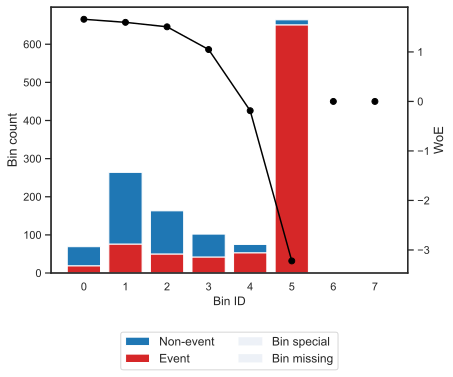

In [36]:

# Plot the Weight of Evidence (WOE) values for each bin in the binning table
binning_table.plot(metric="woe")


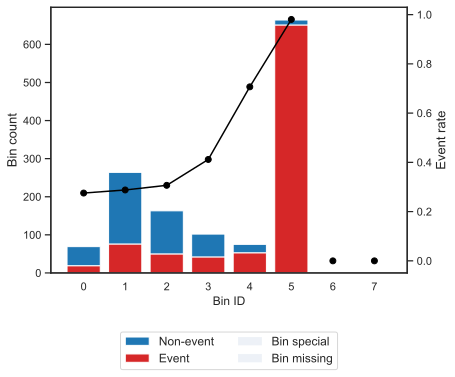

In [37]:
# Plot the event rate values for each bin in the binning table
binning_table.plot(metric="event_rate")


In [38]:
# Initialize a LabelEncoder
labenc = LabelEncoder()

# Apply LabelEncoder to each column if the column dtype is 'object', else keep the column as is
df = df.apply(lambda col: labenc.fit_transform(col) if col.dtype == 'object' else col)

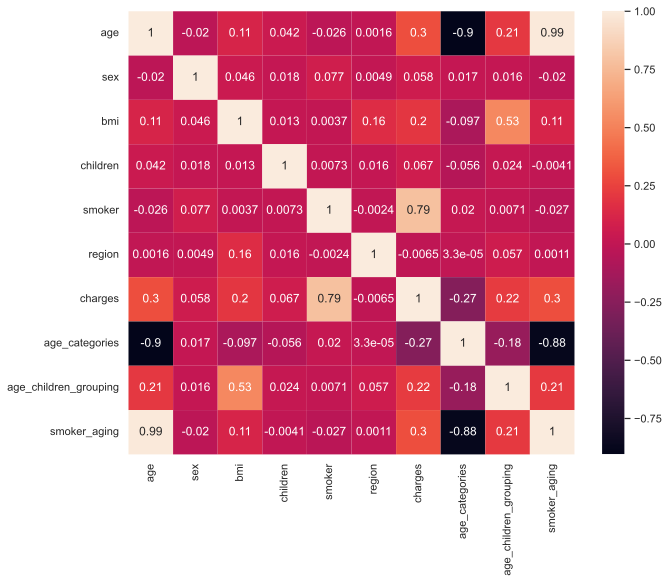

In [39]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix of the dataframe
sns.heatmap(df.corr(), annot=True)

# Display the plot
plt.show()

# <a id='sixth'></a> Data Splitting

In [40]:
# Separating features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

In [41]:
# Splitting the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# <a id='seventh'></a> Model Training

In [43]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Standardize the features in the training set
X_train = scaler.fit_transform(X_train)

# Standardize the features in the test set using the parameters learned from the training set
X_test = scaler.transform(X_test)

In [44]:

# Initialize a Random Forest Regressor model with specified hyperparameters
model = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_split=2, random_state=42, bootstrap=True)

# Train the model on the standardized training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=42)

In [45]:
# Retrieve feature importances from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': df.drop(columns=['charges']).columns, 'Importance': feature_importance})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importance_df)

                 Feature  Importance
4                 smoker    0.665453
2                    bmi    0.183564
8           smoker_aging    0.063429
0                    age    0.062793
7  age_children_grouping    0.007636
3               children    0.007145
6         age_categories    0.005552
5                 region    0.003848
1                    sex    0.000580


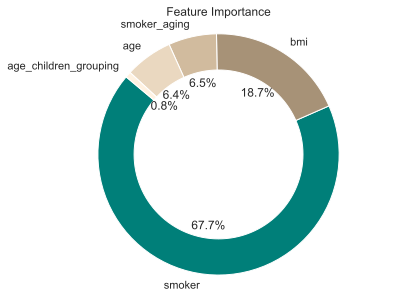

In [46]:
feature_importance_df = feature_importance_df.iloc[:5]

# Create a pie chart
plt.pie(feature_importance_df['Importance'].values, labels=feature_importance_df['Feature'].values, autopct='%1.1f%%', startangle=140, colors =['#007F79', '#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])

# Draw a circle in the center to create a ring
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Feature Importance')

plt.show()

# <a id='eighth'></a> Model Evaluation

In this section, we'll thoroughly evaluate the performance of our predictive model for insurance claims likelihood assessment. Evaluating the model is essential to understand its effectiveness, generalization ability, and potential limitations.



In [47]:
# Predict charges for the test set using the trained model
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the R-squared (R2) score
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.8672041128552073


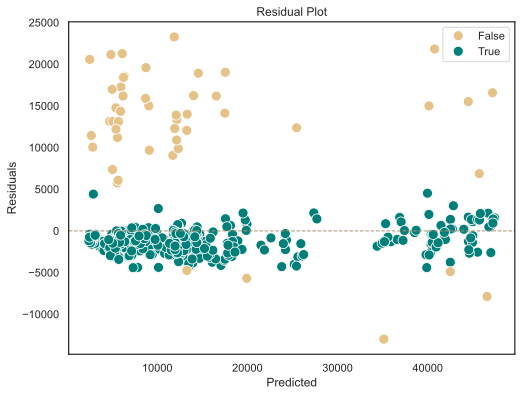

In [48]:
# Calculate residuals
residuals = y_test - y_pred

# Calculate standard deviation of residuals
sigma = np.std(residuals)

# Create a list for hue parameter
hue = list(map(lambda x: abs(x) < sigma, residuals))

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, hue=hue, palette = ['#E5C287', '#007F79'], s=100)
plt.axhline(y=0, color='#A79277', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_pred are your actual and predicted values respectively
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)


RMSE: 4686.217185682992


In [50]:
!pip freeze > requirements.txt

In [51]:
!python3 --version

Python 3.11.7


In [52]:
!which python3

/Users/sergey/.pyenv/versions/3.11.7/bin/python3
